<a href="https://colab.research.google.com/github/ShraavaniTople/IPMV/blob/main/Cat%20Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import shutil
shutil.rmtree('/content/Yolo')

In [1]:
!git clone https://github.com/YashBamne/Yolo.git
%ls

Cloning into 'Yolo'...
remote: Enumerating objects: 3538, done.
remote: Counting objects: 100% (2112/2112), done.
remote: Compressing objects: 100% (1914/1914), done.
remote: Total 3538 (delta 1), reused 2107 (delta 1), pack-reused 1426
Receiving objects: 100% (3538/3538), 446.31 MiB | 24.25 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Updating files: 100% (3123/3123), done.
sample_data/  Yolo/


In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf

In [13]:
# Define image size
image_size = (224, 224)  # Adjusted to a common size used in many pre-trained models

# Function to preprocess images
def preprocess_image(image_path):
    # Read image using cv2
    image = cv2.imread(image_path)
    # Convert image to RGB color mode
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resize image
    image = cv2.resize(image, image_size)
    # Normalize pixel values (for models trained on ImageNet)
    image = tf.keras.applications.mobilenet.preprocess_input(image)
    return image


In [15]:
# Define the folder containing cat images
cat_image_folder = "/content/Yolo/database/Cat"

# Load cat images and preprocess them
cat_image_data = []
for filename in os.listdir(cat_image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(cat_image_folder, filename)
        image_array = preprocess_image(image_path)
        cat_image_data.append(image_array)

# Convert image data to numpy array
cat_image_data = np.array(cat_image_data)


In [16]:
# Define the CNN model architecture
model = tf.keras.Sequential([
    # Add convolutional layers
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=image_size+(3,)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Flatten the feature maps
    tf.keras.layers.Flatten(),
    # Add fully connected layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for cat detection
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
# Save the model for future use in cat detection
model.save("cat_detection")


1/1 [==============================] - 0s 139ms/step
No cat detected.


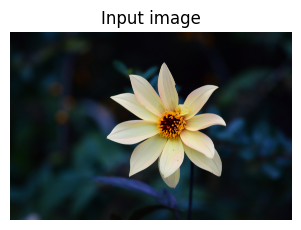

In [24]:
import cv2
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = tf.keras.models.load_model("cat_detection")

# Function to preprocess a single image and crop excess background
def preprocess_and_crop_image(image_path):
    # Read image using cv2
    image = cv2.imread(image_path)
    # Convert image to RGB color mode
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Apply binary thresholding
    _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Get bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(contours[0])
    # Crop the image to the bounding box
    cropped_image = image[y:y+h, x:x+w]
    # Resize image to match model input size
    resized_image = cv2.resize(cropped_image, image_size)
    # Preprocess image
    preprocessed_image = tf.keras.applications.mobilenet.preprocess_input(resized_image)
    return preprocessed_image, cropped_image

# Function to detect cat in an image and display the result
def detect_cat(image_path):
    # Preprocess and crop the image
    preprocessed_image, cropped_image = preprocess_and_crop_image(image_path)
    # Display the preprocessed and cropped image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cropped_image)
    plt.title("Input image")
    plt.axis("off")
    # Expand dimensions to match model input shape
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
    # Use the loaded model to make predictions
    prediction = loaded_model.predict(preprocessed_image)
    # Check if cat is detected
    if prediction[0] > 0.5:
        print("Cat detected!")
    else:
        print("No cat detected.")
    plt.show()

# Path to the image you want to detect cats in
image_path = "/content/Yolo/database/try/flower.jpg"

# Detect cat in the image
detect_cat(image_path)


New one :